<a href="https://colab.research.google.com/github/gabrie1-s/WQA_Regression_HW2/blob/main/Teste_skew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
import scipy as scipy
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
import math
from scipy import stats

In [5]:
drive.mount('/content/drive')

w_wine = pd.read_csv('drive/My Drive/ICA/winequality-white.csv', sep = ';')
r_wine = pd.read_csv('drive/My Drive/ICA/winequality-red.csv', sep = ';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Considerações iniciais sobre as variáveis

In [6]:
w_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
r_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#1.Vinho Branco

O valor da variável skew_val vai determinar a partir de qual skew as transformações serão aplicadas, ou seja, as transformações serão aplicadas a todos os preditores cuja skew $S \geq $ skew_val.

Testamos vários valores para skew_val (0.9, 1.0, 1.2 e 1.5), mas o que obteve mais resultados foi 1.2.

In [8]:
skew_val = 1.2

### Teste remoção skew box-cox

In [9]:
w_wine.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [10]:
w_wine_bc = w_wine.copy()

In [11]:
for col in w_wine_bc.columns:
    if w_wine_bc[col].skew() >= skew_val and w_wine_bc[col].min() > 0:
        w_wine_bc[col] = stats.boxcox(w_wine_bc[col])[0]

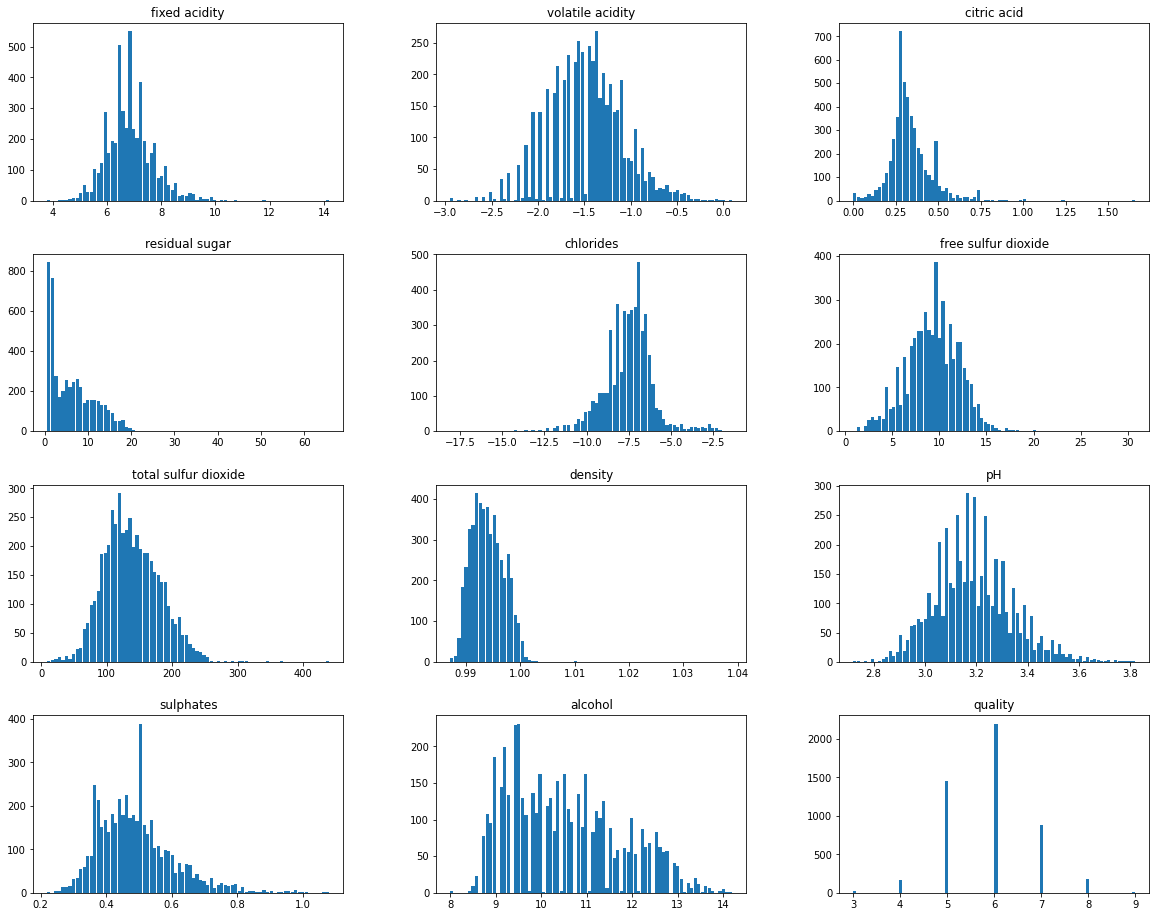

In [12]:
w_wine_bc.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
plt.show()

In [13]:
w_wine_bc.skew()

fixed acidity           0.647751
volatile acidity       -0.005003
citric acid             1.281920
residual sugar          1.077094
chlorides              -0.159151
free sulfur dioxide     0.030907
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

### Teste remoção skew Yeo-Johnson

In [14]:
w_wine_yj = w_wine.copy()

In [15]:
for col in w_wine_yj.columns:
    if w_wine_yj[col].skew() >= skew_val:
        w_wine_yj[col] = stats.yeojohnson(w_wine_yj[col])[0]

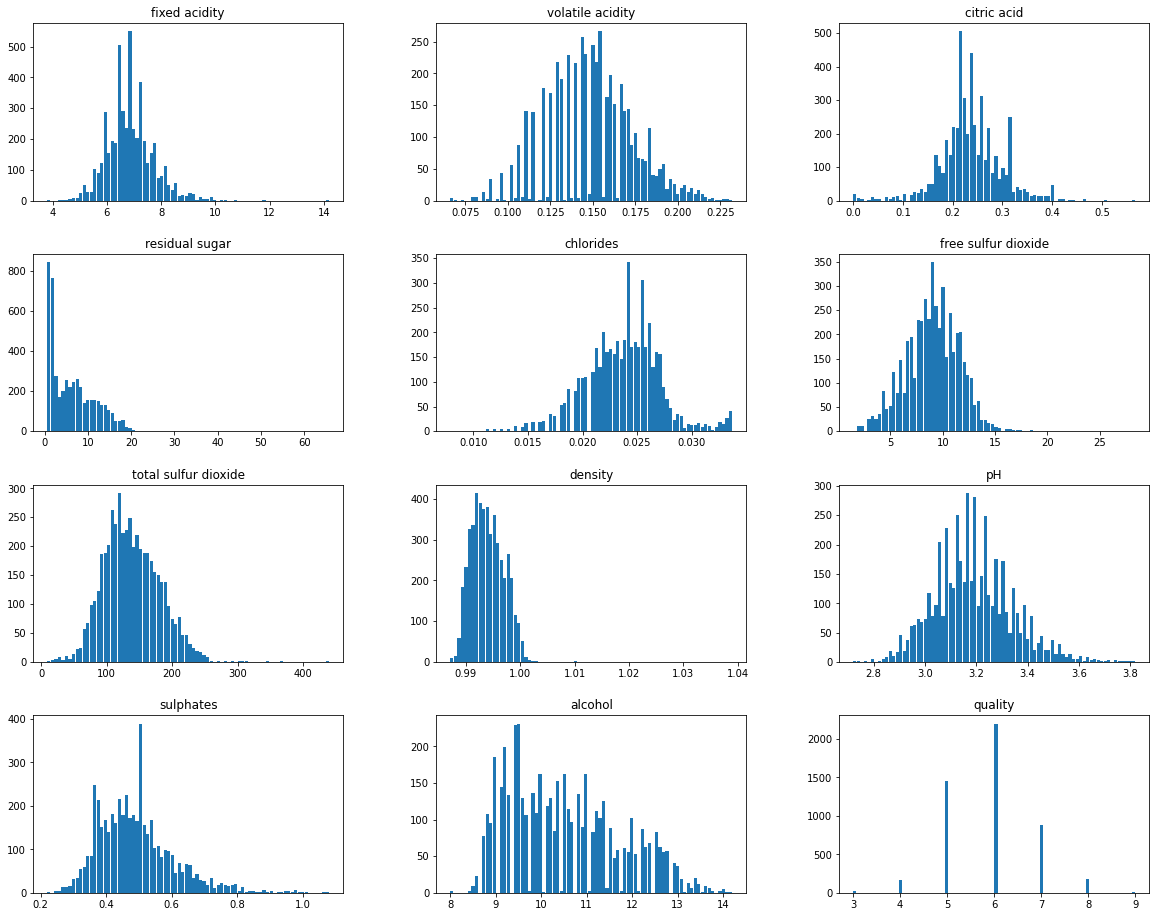

In [16]:
w_wine_yj.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
plt.show()

In [17]:
w_wine_yj.skew()

fixed acidity           0.647751
volatile acidity        0.008625
citric acid            -0.074578
residual sugar          1.077094
chlorides              -0.066480
free sulfur dioxide     0.026995
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

### Teste remoção skew normalização logarítmica

In [18]:
w_wine.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [19]:
w_wine_lg = w_wine.copy()

In [20]:
for col in w_wine_lg.columns:
    if w_wine_lg[col].skew() >= skew_val and w_wine_lg[col].min() > 0:
        w_wine_lg[col] = np.log(w_wine_lg[col])

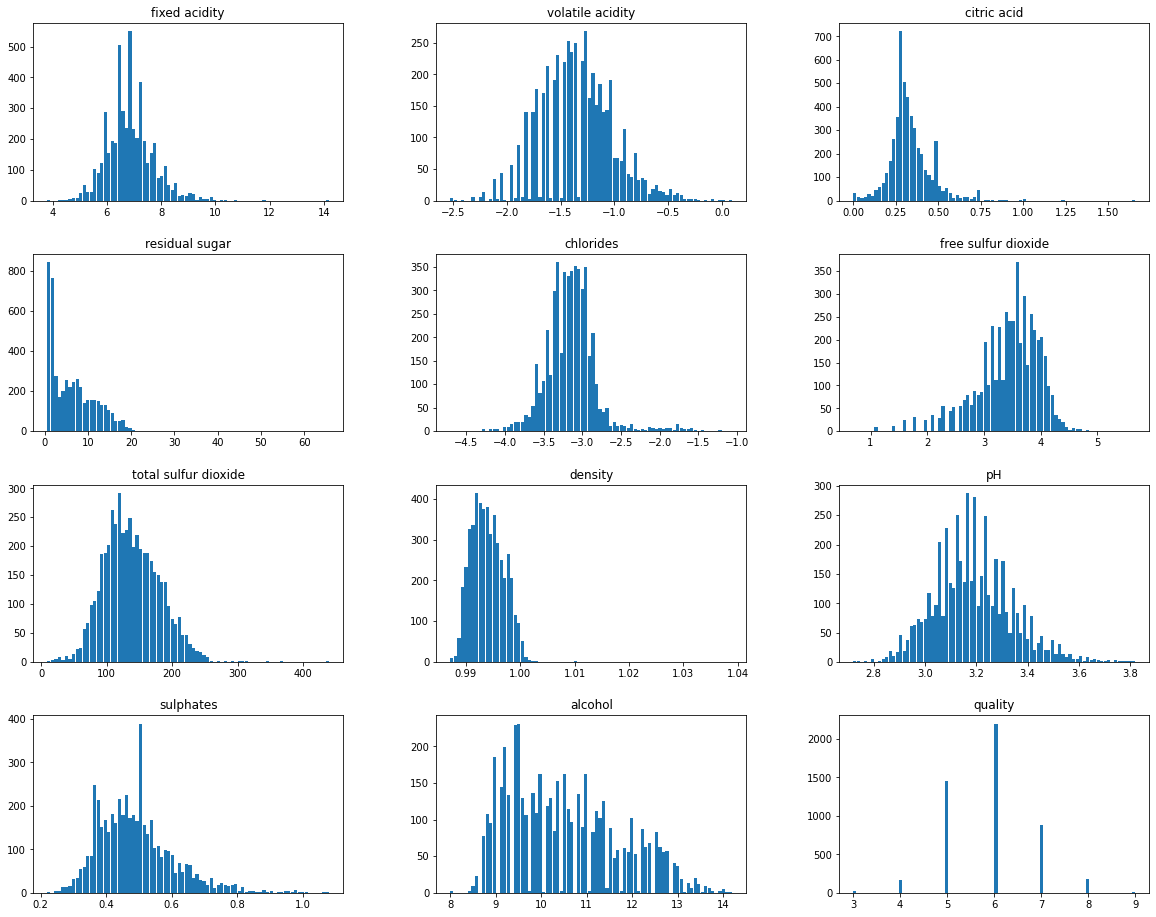

In [21]:
w_wine_lg.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
plt.show()

In [22]:
w_wine_lg.skew()

fixed acidity           0.647751
volatile acidity        0.139383
citric acid             1.281920
residual sugar          1.077094
chlorides               1.134134
free sulfur dioxide    -0.936322
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

### Comparação

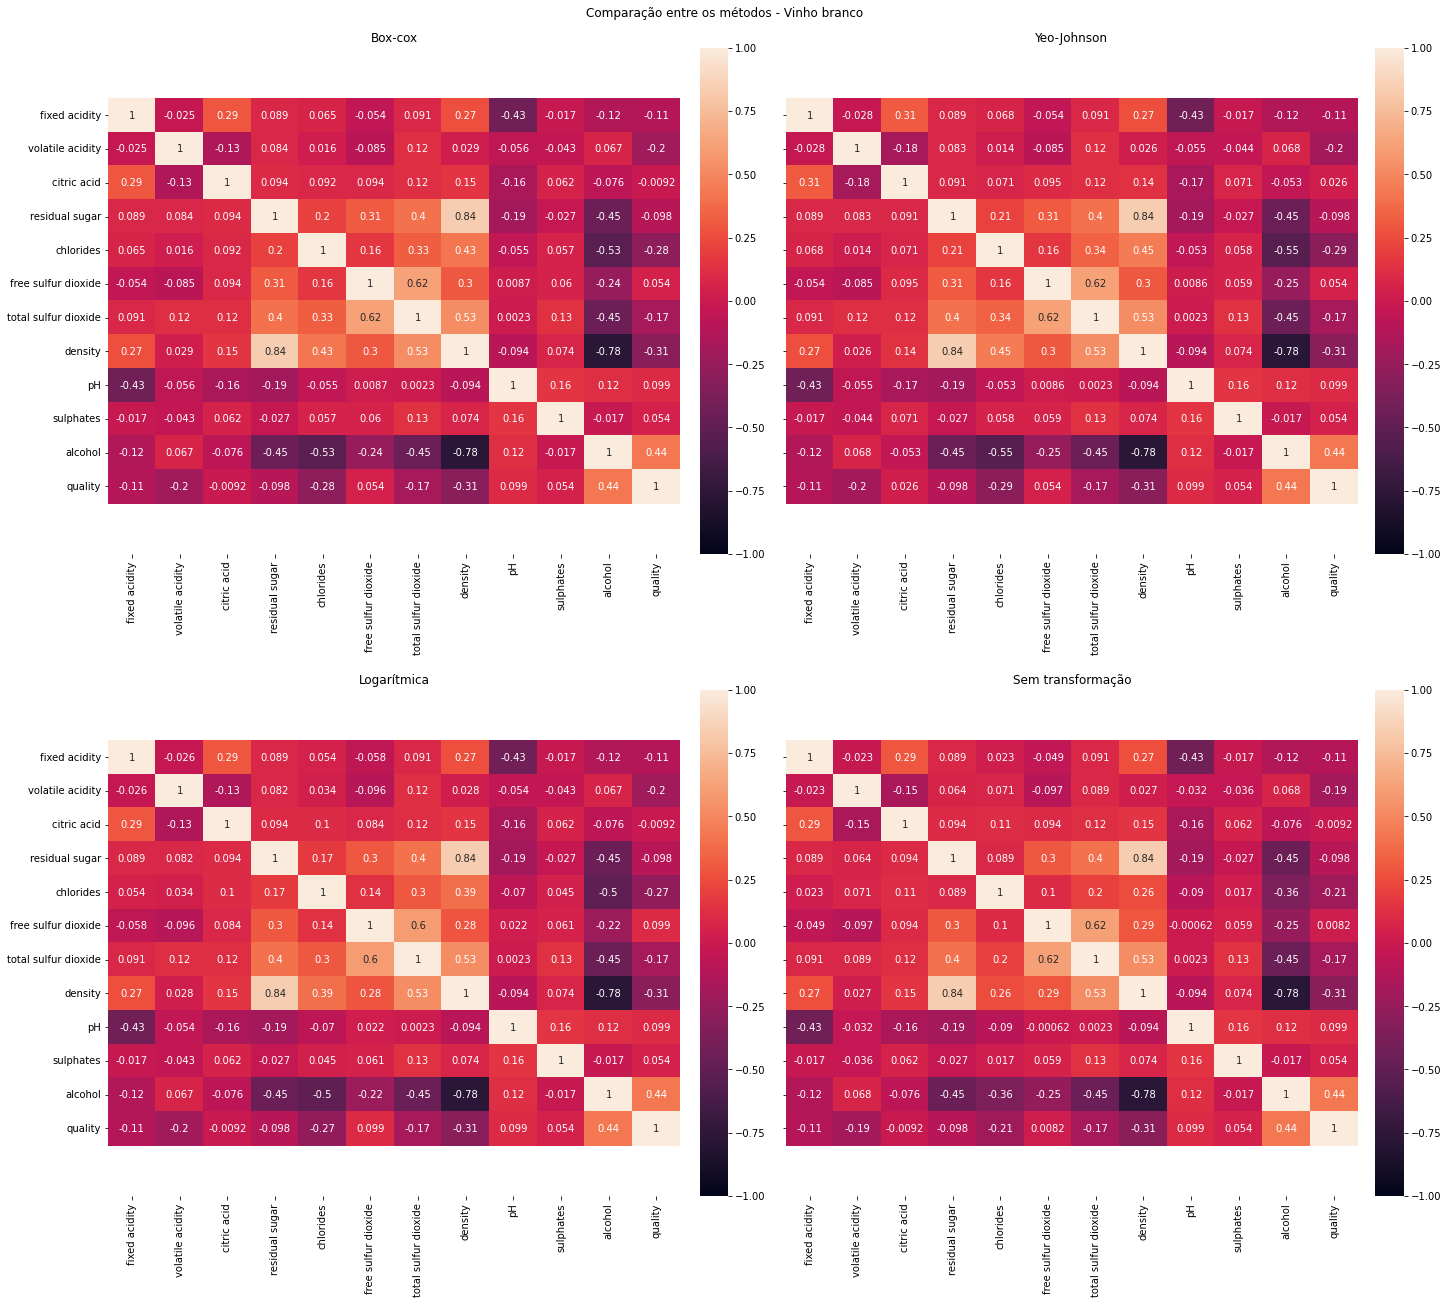

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18), sharey=True, constrained_layout=True)
fig.suptitle('Comparação entre os métodos - Vinho branco')

#Box-cox
ax = sns.heatmap(w_wine_bc.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,0])
axes[0,0].set_title("Box-cox")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Yeo-Johnson
ax = sns.heatmap(w_wine_yj.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,1])
axes[0,1].set_title("Yeo-Johnson")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Logarítmica
ax = sns.heatmap(w_wine_lg.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)
axes[1,0].set_title("Logarítmica")

#Sem transformação
ax = sns.heatmap(w_wine.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,1])
axes[1,1].set_title("Sem transformação")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)
plt.savefig("branco.png")

Observe que não houve o aparecimento de nenhuma nova correlação significativa ($\geq 0.6$)depois da aplicação das transformações. A única variável que mostrou um crescimento considerável em suas correlações foram os cloretos, esse aumento, no entanto, não foi suficiente para gerar correlações significativas, como já dito.

A seguir vamos aplicar a remoção dos outliers, a importância desse procedimento para os modelos de predição já foi atestada [[1]](https://colab.research.google.com/drive/1WFGPYlEU5jztAdq63IMqfaezx3w5JAHr?usp=sharing).

### Comparação após remoção de outliers

In [24]:
#Algoritmo de remoção de outliers

def plot_boxplot(df, ft):
  df.boxplot(column = [ft])
  plt.grid(False)
  plt.show()

def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  I = Q3 - Q1
  LwLimit = Q1 - 1.5*I
  UpLimit = Q3 + 1.5*I
  ls = df.index[(df[ft] < LwLimit) | (df[ft] > UpLimit)]
  return ls

def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

def apply_remotion(dataset):
  remover = []
  for i in dataset:
      if(i!='quality'):
          remover.extend(outliers(dataset, i))
  w_wine_cleaned = remove(dataset, remover)
  return w_wine_cleaned

In [25]:
#Remoção de outliers
w_wine_bc = apply_remotion(w_wine_bc)
w_wine_yj = apply_remotion(w_wine_yj)
w_wine_lg = apply_remotion(w_wine_lg)
w_wine = apply_remotion(w_wine)

(13.5, -1.5)

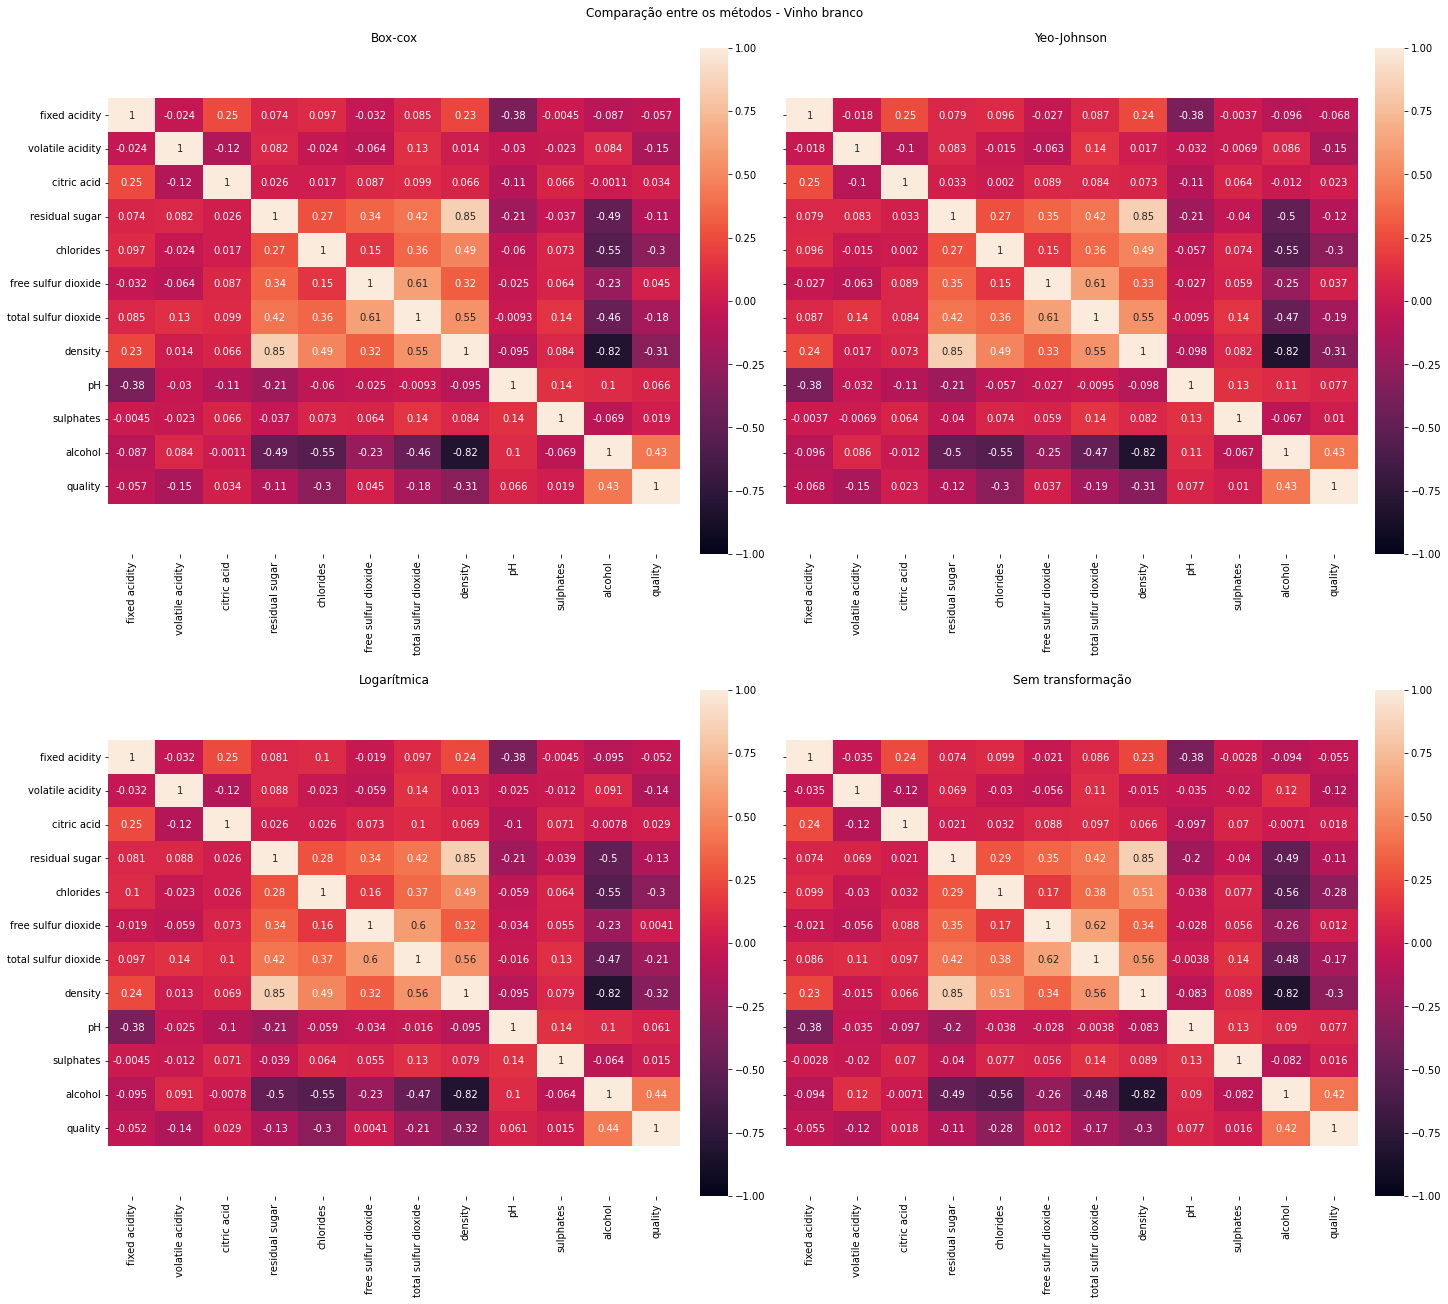

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18), sharey=True, constrained_layout=True)
fig.suptitle('Comparação entre os métodos - Vinho branco')

#Box-cox
ax = sns.heatmap(w_wine_bc.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,0])
axes[0,0].set_title("Box-cox")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Yeo-Johnson
ax = sns.heatmap(w_wine_yj.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,1])
axes[0,1].set_title("Yeo-Johnson")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Logarítmica
ax = sns.heatmap(w_wine_lg.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)
axes[1,0].set_title("Logarítmica")

#Sem transformação
ax = sns.heatmap(w_wine.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,1])
axes[1,1].set_title("Sem transformação")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

Após a remoção dos outliers, vemos que a diferença entre as correlações dos datasets que sofreram alguma transformação para o que não sofreu é quase inexistente. Isso se deve ao fato de que, ao removermos os outliers, removemos os componentes de baixa frequência que causam um aumento da skew. Dessa forma, é como se a remoção dessas amostras já fosse capaz de "corrigir" as obliquidades nos histogramas dos preditores.

Portanto, concluímos que a aplicação de métodos de tratamento de obliquidade faz pouca diferença se comparado ao conjunto de dados original, se tornando quase nula após a remoção dos outliers. Logo, o tratamento da obliquidade parece ser irrelevante e desnecessário.

#2.Vinho Tinto

O valor da variável skew_val vai determinar a partir de qual skew as transformações serão aplicadas, ou seja, as transformações serão aplicadas a todos os preditores cuja skew $S \geq $ skew_val.

Testamos vários valores para skew_val (0.9, 1.0, 1.2 e 1.5).

In [27]:
skew_val = 1.5

### Teste remoção skew box-cox

In [28]:
r_wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [29]:
r_wine_bc = r_wine.copy()

In [30]:
for col in r_wine_bc.columns:
    if r_wine_bc[col].skew() >= skew_val and r_wine_bc[col].min() > 0:
        r_wine_bc[col] = stats.boxcox(r_wine_bc[col])[0]

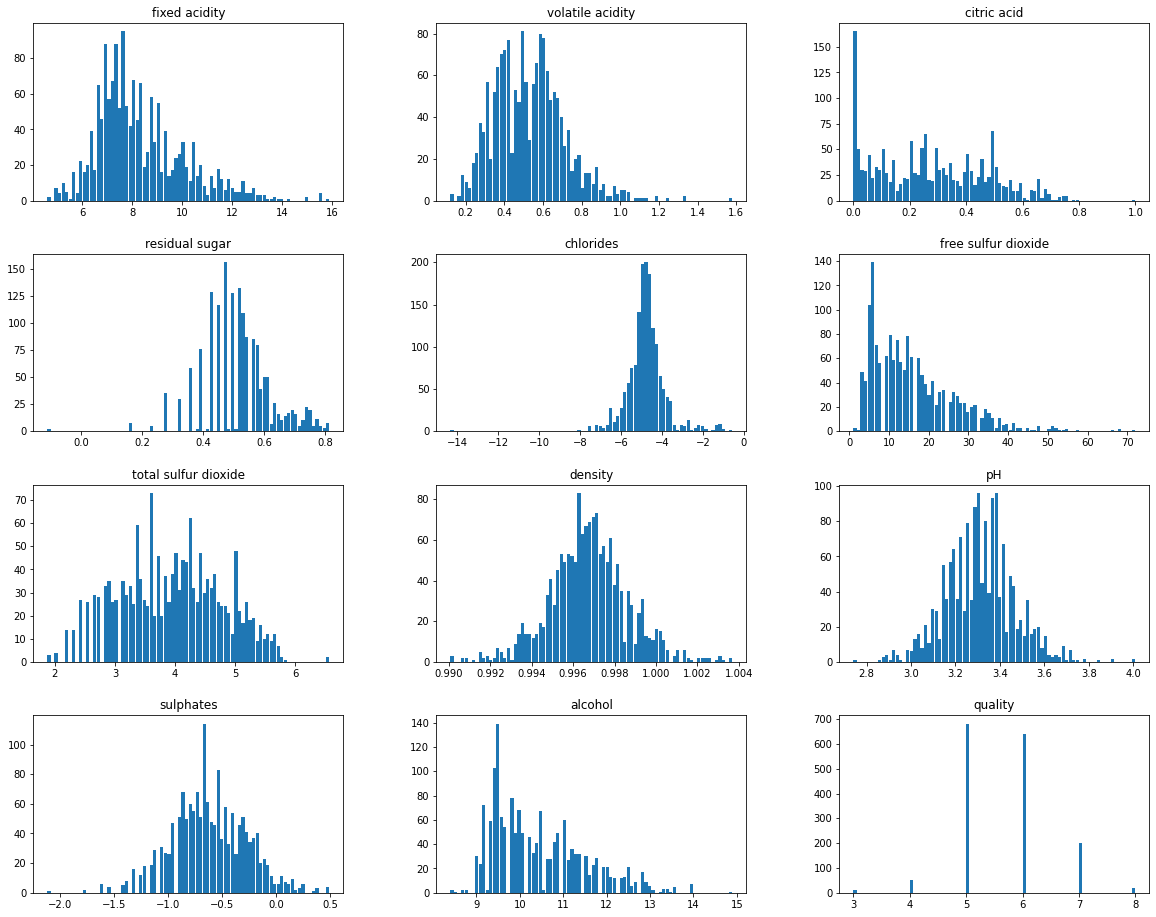

In [31]:
r_wine_bc.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
plt.show()

In [32]:
r_wine_bc.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar         -0.095930
chlorides              -0.499643
free sulfur dioxide     1.250567
total sulfur dioxide   -0.008028
density                 0.071288
pH                      0.193683
sulphates              -0.024779
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Teste remoção skew Yeo-Johnson

In [33]:
r_wine_yj = r_wine.copy()

In [34]:
for col in r_wine_yj.columns:
    if r_wine_yj[col].skew() >= skew_val:
        r_wine_yj[col] = stats.yeojohnson(r_wine_yj[col])[0]

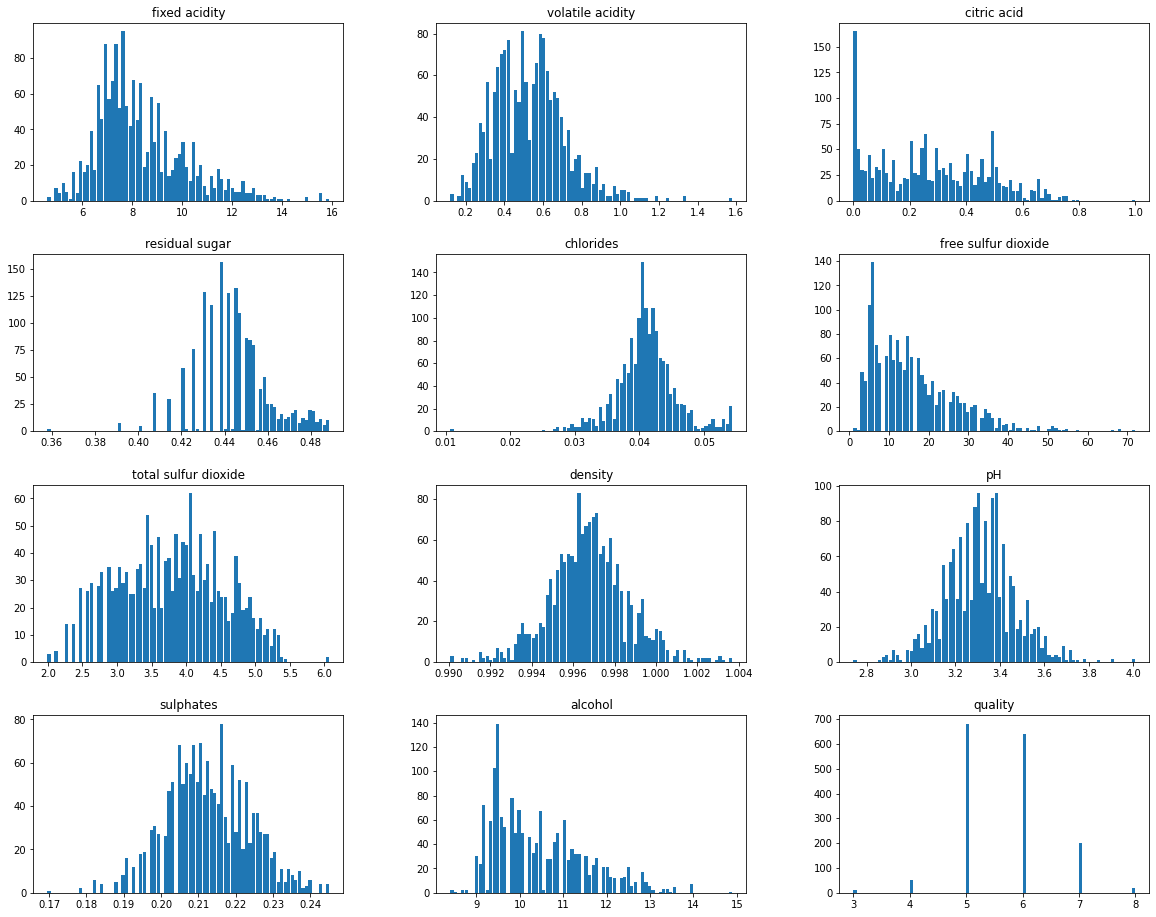

In [35]:
r_wine_yj.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
plt.show()

In [36]:
r_wine_yj.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide     1.250567
total sulfur dioxide   -0.003752
density                 0.071288
pH                      0.193683
sulphates               0.009985
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Teste remoção skew normalização logarítmica

In [37]:
r_wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [38]:
r_wine_lg = r_wine.copy()

In [39]:
for col in r_wine_lg.columns:
    if r_wine_lg[col].skew() >= skew_val and r_wine_lg[col].min() > 0:
        r_wine_lg[col] = np.log(r_wine_lg[col])

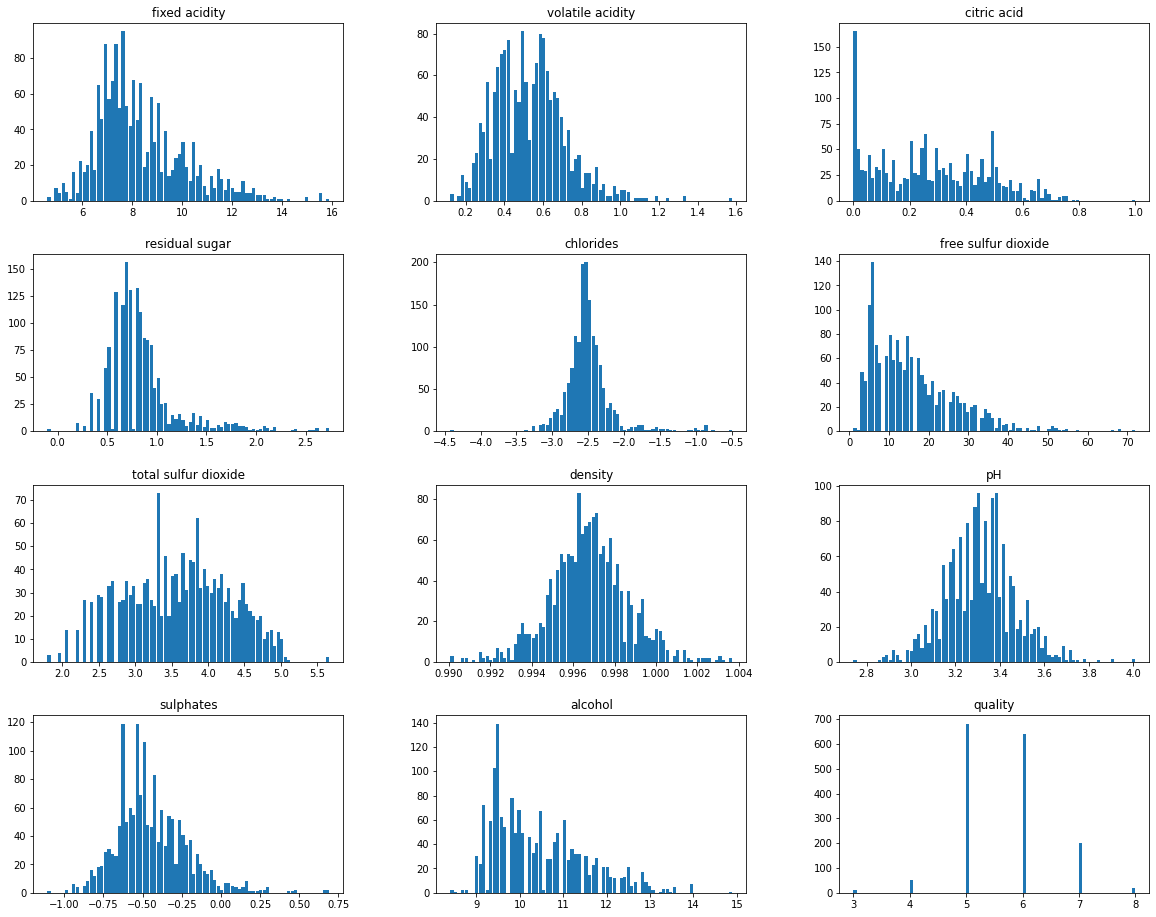

In [40]:
r_wine_lg.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
plt.show()

In [41]:
r_wine_lg.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Comparação

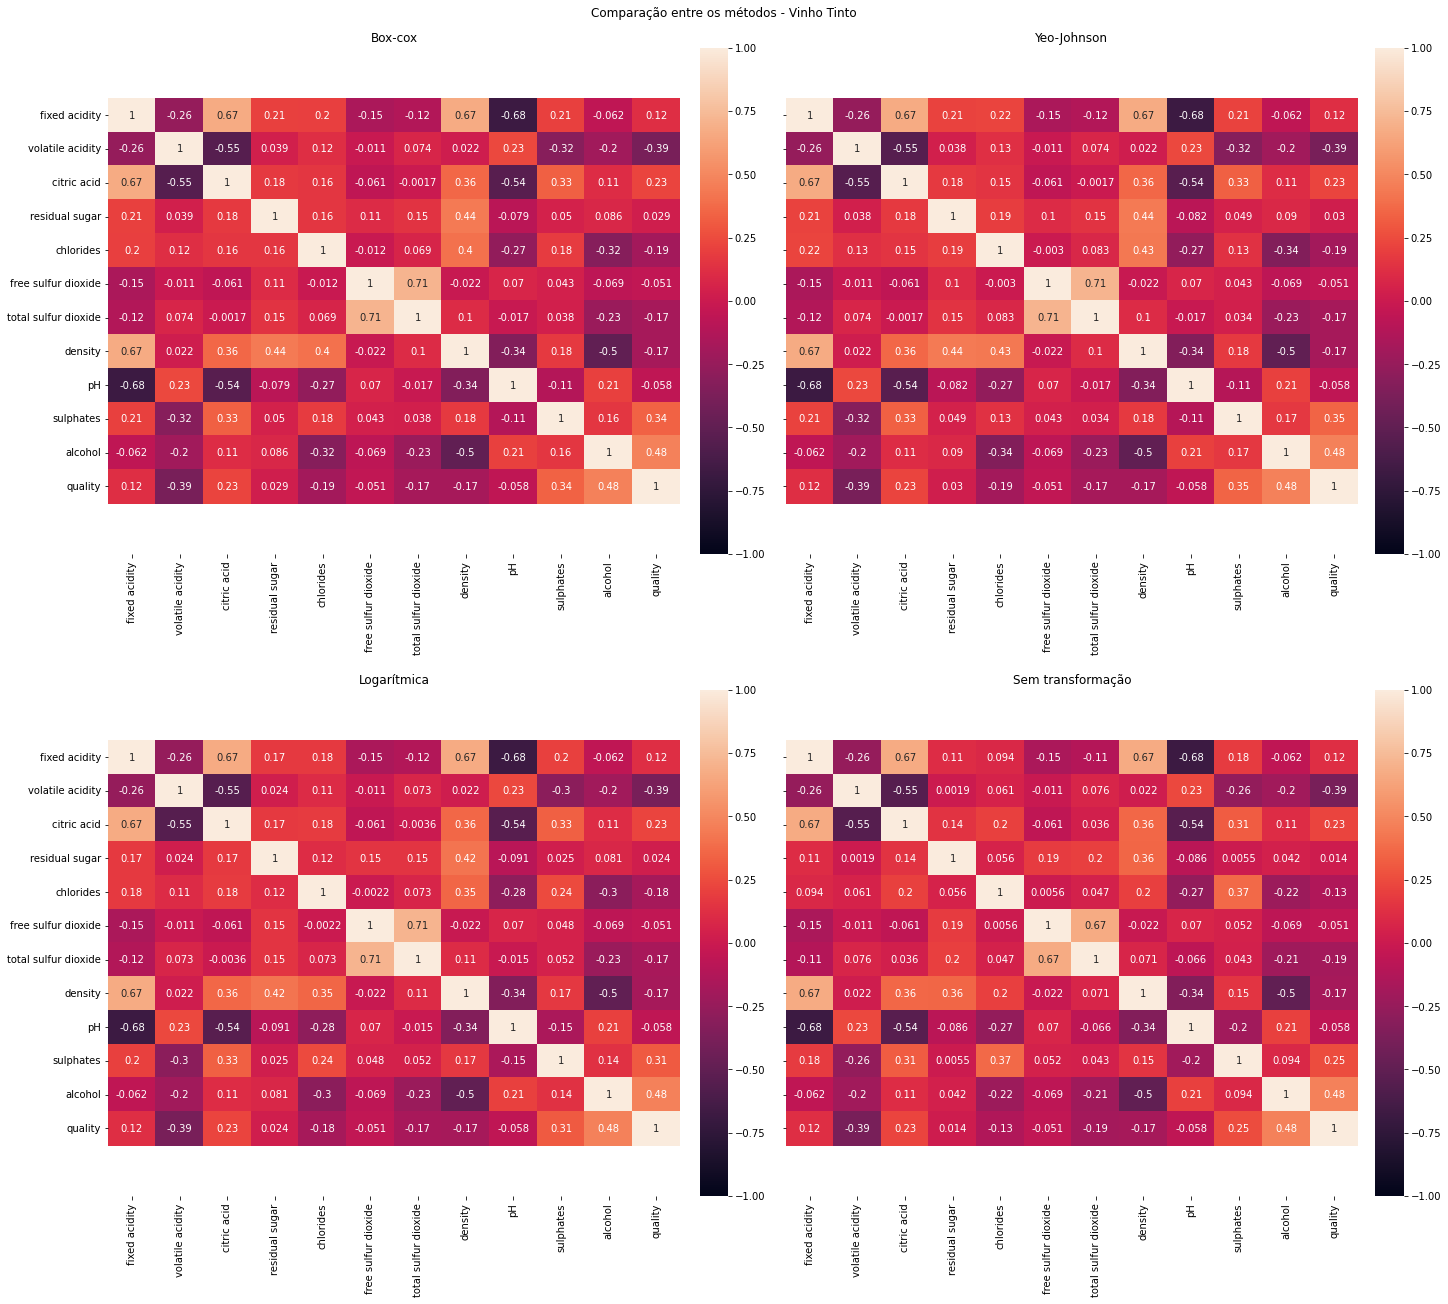

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18), sharey=True, constrained_layout=True)
fig.suptitle('Comparação entre os métodos - Vinho Tinto')

#Box-cox
ax = sns.heatmap(r_wine_bc.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,0])
axes[0,0].set_title("Box-cox")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Yeo-Johnson
ax = sns.heatmap(r_wine_yj.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,1])
axes[0,1].set_title("Yeo-Johnson")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Logarítmica
ax = sns.heatmap(r_wine_lg.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)
axes[1,0].set_title("Logarítmica")

#Sem transformação
ax = sns.heatmap(r_wine.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,1])
axes[1,1].set_title("Sem transformação")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)
plt.savefig("tinto.png")

Observe que, assim como no vinho branco, não houve o aparecimento de nenhuma nova correlação significativa ($\geq 0.6$) depois da aplicação das transformações. Algumas variáveis mostraram um crescimento razoável em suas correlações, como os cloretos foram os cloretos, por exemplo. No entanto, isso não foi suficiente para gerar novas correlações significativas, como já dito.

A seguir vamos aplicar a remoção dos outliers.

### Comparação após remoção de outliers

In [43]:
#Remoção de outliers
r_wine_bc = apply_remotion(r_wine_bc)
r_wine_yj = apply_remotion(r_wine_yj)
r_wine_lg = apply_remotion(r_wine_lg)
r_wine = apply_remotion(r_wine)

(13.5, -1.5)

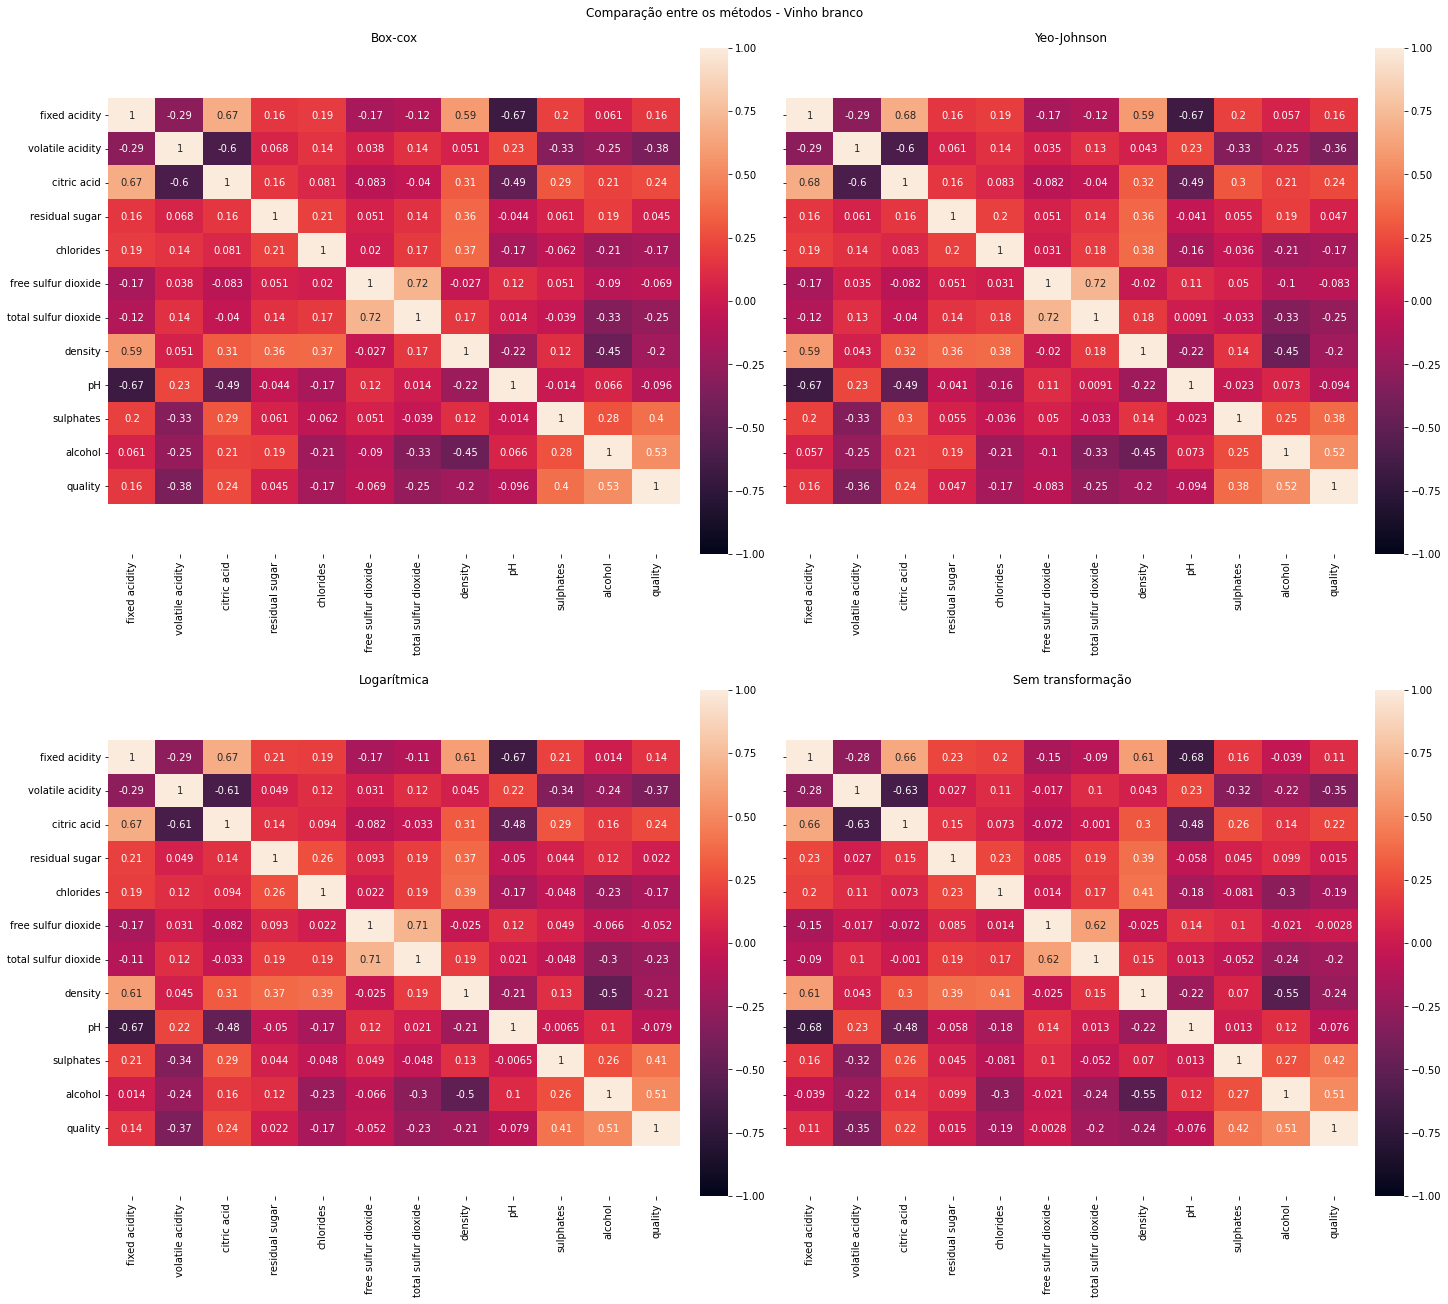

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(20, 18), sharey=True, constrained_layout=True)
fig.suptitle('Comparação entre os métodos - Vinho branco')

#Box-cox
ax = sns.heatmap(r_wine_bc.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,0])
axes[0,0].set_title("Box-cox")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Yeo-Johnson
ax = sns.heatmap(r_wine_yj.corr(), annot=True, vmin=-1, vmax=1, ax = axes[0,1])
axes[0,1].set_title("Yeo-Johnson")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

#Logarítmica
ax = sns.heatmap(r_wine_lg.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,0])
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)
axes[1,0].set_title("Logarítmica")

#Sem transformação
ax = sns.heatmap(r_wine.corr(), annot=True, vmin=-1, vmax=1, ax = axes[1,1])
axes[1,1].set_title("Sem transformação")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 1.5)

Após a remoção dos outliers, vemos que a diferença entre as correlações nos datasets que sofreram alguma transformação para o que não sofreu é pequena. A única excessão foi a correlação entre os dois tipos de enxofre, que sofreu um aumento de 0.1 (foi de 0.62 para 0.72). A correlação entre os enxofres, no entanto, já era relevante (0.62), de modo que esse aumento não causará prejuízos maiores ao modelo, principalmeente, porque correlações maiores que 0.6 serão tratadas pela remoção de um dos preditores ou peloa aplicação da PCA.

Portanto, concluímos que a aplicação de métodos de tratamento de obliquidade faz pouca diferença se comparado ao conjunto de dados original, após a remoção dos outliers. Logo, o tratamento da obliquidade parece ser desnecessário para esse tipo de vinho também.